In [22]:
# Take the state in q0 and teleport in q2
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [27]:
secret_number = '1001001'

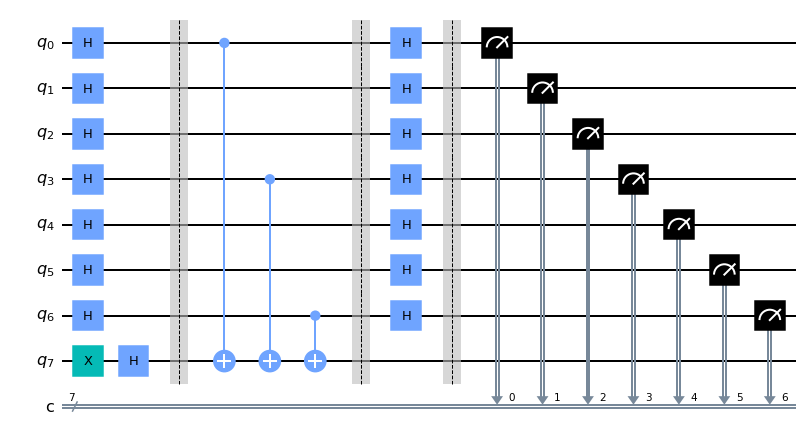

In [28]:

input_len = len(secret_number)
circuit = QuantumCircuit(input_len+ 1,input_len)
circuit.h(range(input_len))
circuit.x(input_len)
circuit.h(input_len)
circuit.barrier()

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        circuit.cx(ii,input_len)

circuit.barrier()
circuit.h(range(input_len))
circuit.barrier()

circuit.measure(range(input_len), range(input_len))
circuit.draw(output="mpl")




In [29]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1001001': 1}
